<a href="https://colab.research.google.com/github/beverleyappiatse/HayRajBev/blob/main/SMSSpamEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("SMSSpamCollection.csv", encoding='latin-1', header=None, names=['label', 'message'])

Saving SMSSpamCollection.csv to SMSSpamCollection.csv


In [ ]:
df

label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ã¼ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

(5572, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


/tmp/ipython-input-2983318788.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='Set2')


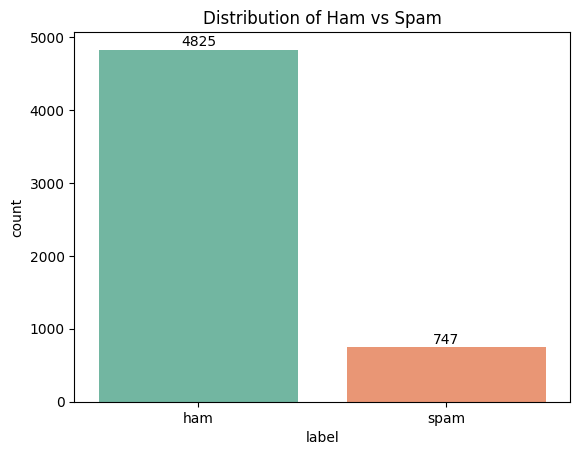

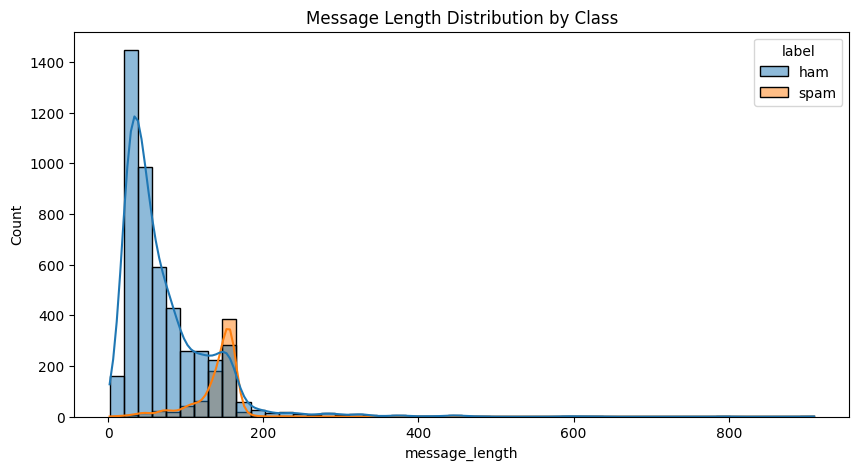

label
ham      71.549845
spam    139.077644
Name: message_length, dtype: float64
Duplicates: 414


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick overview
print(df.shape)              # number of rows, columns
print(df.info())             # data types, nulls
print(df.head())             # preview first few rows

counts = df['label'].value_counts()

ax = sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Ham vs Spam")

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,  # adjust +50 for spacing
            f'{int(height)}', ha="center")

plt.show()

# Message length feature
df['message_length'] = df['message'].apply(len)

# Compare distributions
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution by Class")
plt.show()

# Average message length by class
print(df.groupby('label')['message_length'].mean())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())